# Prediksi Diagnosis Kanker Payudara Menggunakan Algoritma Klasifikasi pada Dataset Breast Cancer Wisconsin

## Pendahuluan
Kanker payudara merupakan salah satu jenis kanker yang paling banyak dialami oleh wanita di seluruh dunia. Deteksi dini terhadap kanker payudara sangat penting untuk meningkatkan peluang kesembuhan dan mengurangi tingkat kematian akibat penyakit ini.Salah satu metode deteksi adalah dengan menganalisis hasil pemeriksaan sel payudara menggunakan teknik Fine Needle Aspiration (FNA), di mana karakteristik sel diperiksa untuk menentukan apakah tumor bersifat jinak atau ganas.  

Dalam penelitian atau tugas ini, digunakan algoritma klasifikasi machine learning untuk memprediksi diagnosis kanker payudara berdasarkan dataset **Breast Cancer Wisconsin**. Tujuannya adalah untuk membangun model yang dapat membantu prediksi secara otomatis dengan akurasi yang tinggi.

# Data Undestanding


## Sumber data
dataset diambil dari link dibawah ini:  

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Dataset ini tersedia di UCI Machine Learning Repositor Basis data kanker payudara ini diperoleh dari University of Wisconsin Hospitals, Madison, dari Dr. William H. Wolberg

# Tujuan

Tujuan dari penelitian atau tugas ini adalah untuk membangun dan mengevaluasi model klasifikasi yang dapat digunakan untuk memprediksi diagnosis kanker payudara berdasarkan karakteristik sel hasil pemeriksaan Fine Needle Aspiration (FNA) yang terdapat pada dataset Breast Cancer Wisconsin.

## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

![image.png](dataset-dari-uci.png)

In [38]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# Ambil dataset dari UCI
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

# Data fitur (X) dan target (y)
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

# Gabungkan fitur dan target jadi satu dataframe
df = pd.concat([X, y], axis=1)

# Tampilkan metadata
print(breast_cancer_wisconsin_original.metadata) 

# Tampilkan informasi variabel
print(breast_cancer_wisconsin_original.variables) 

# Simpan ke file CSV
df.to_csv("breast_cancer_wisconsin_original.csv", index=False)

# Tampilkan info fitur-fitur
print(df.info())  

# Tampilkan 5 baris pertama
print(df.head())  


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

# Eksplorasi data

## Visualisai data

In [4]:
display(df)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


# Struktur dataset  

## Fitur dan Label

In [14]:
df.shape  # Tampilkan dimensi dataframe

(699, 10)

terdapat 699 baris dan 10 kolom

In [15]:
df.columns # Tampilkan nama-nama kolom

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Berikut adalah fitur-fitur yang terdapat dalam dataset yang digunakan:

| No | Nama Fitur                     | Deskripsi                                                |
|----|---------------------------------|----------------------------------------------------------|
| 1  | Clump_thickness                | Ketebalan klaster sel                                    |
| 2  | Uniformity_of_cell_size        | Keseragaman ukuran sel                                   |
| 3  | Uniformity_of_cell_shape       | Keseragaman bentuk sel                                   |
| 4  | Marginal_adhesion              | Kemampuan sel untuk saling menempel di tepi              |
| 5  | Single_epithelial_cell_size    | Ukuran sel epitel tunggal                                |
| 6  | Bare_nuclei                    | Inti sel tanpa lapisan                                   |
| 7  | Bland_chromatin                | Homogenitas atau kekasaran kromatin pada inti sel        |
| 8  | Normal_nucleoli                | Ukuran normal nukleoli (struktur kecil dalam inti sel)   |
| 9  | Mitoses                        | Jumlah pembelahan sel yang terdeteksi                    |
| 10 | Class                          | Kategori diagnosis: 2 = Jinak (Benign), 4 = Ganas (Malignant) |


In [5]:
df.describe()
# Tampilkan statistik deskriptif

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [22]:
df.dtypes # Tampilkan tipe data setiap kolom

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Deskripsi Fitur Dataset Breast Cancer Wisconsin (Original)

| No | Nama Fitur                    | Tipe Data             | Deskripsi                                                                 |
|----|-------------------------------|-----------------------|--------------------------------------------------------------------------|
| 1  | Clump_thickness               | Kategorikal Ordinal   | Ketebalan klaster sel. Nilai besar menunjukkan kumpulan sel lebih tebal. |
| 2  | Uniformity_of_cell_size       | Kategorikal Ordinal   | Keseragaman ukuran sel. Nilai tinggi menunjukkan ukuran sel tidak seragam. |
| 3  | Uniformity_of_cell_shape      | Kategorikal Ordinal   | Keseragaman bentuk sel. Nilai tinggi menunjukkan bentuk sel tidak seragam. |
| 4  | Marginal_adhesion             | Kategorikal Ordinal   | Kemampuan sel untuk saling menempel di tepi. Nilai besar menunjukkan ketidaknormalan. |
| 5  | Single_epithelial_cell_size   | Kategorikal Ordinal   | Ukuran sel epitel tunggal. Ukuran besar dapat mengindikasikan abnormalitas. |
| 6  | Bare_nuclei                   | Kategorikal Ordinal   | Jumlah inti sel yang terlihat jelas tanpa lapisan. Nilai tinggi berpotensi indikasi keganasan. |
| 7  | Bland_chromatin               | Kategorikal Ordinal   | Homogenitas kromatin dalam inti sel. Nilai besar menunjukkan ketidakteraturan kromatin. |
| 8  | Normal_nucleoli               | Kategorikal Ordinal   | Jumlah nukleoli normal dalam inti sel. Nilai besar dapat menunjukkan abnormalitas. |
| 9  | Mitoses                       | Kategorikal Ordinal   | Jumlah proses pembelahan sel (mitosis). Nilai besar mengindikasikan aktivitas sel abnormal. |
| 10 | Class                         | Kategorikal Nominal   | Label diagnosis: 2 = Jinak (*Benign*), 4 = Ganas (*Malignant*). |


In [23]:
df['Class'].value_counts()
# Tampilkan jumlah setiap kelas dalam kolom 'Class'

Class
2    458
4    241
Name: count, dtype: int64

Visualisasi distribusi kelas menggunakan seaborn

<Axes: xlabel='Class', ylabel='count'>

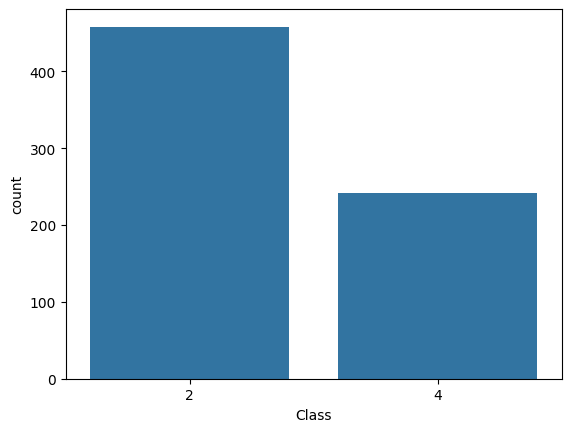

In [ ]:
import seaborn as sns
sns.countplot(x='Class', data=df)


Visualisasi korelasi antar fitur menggunakan heatmap

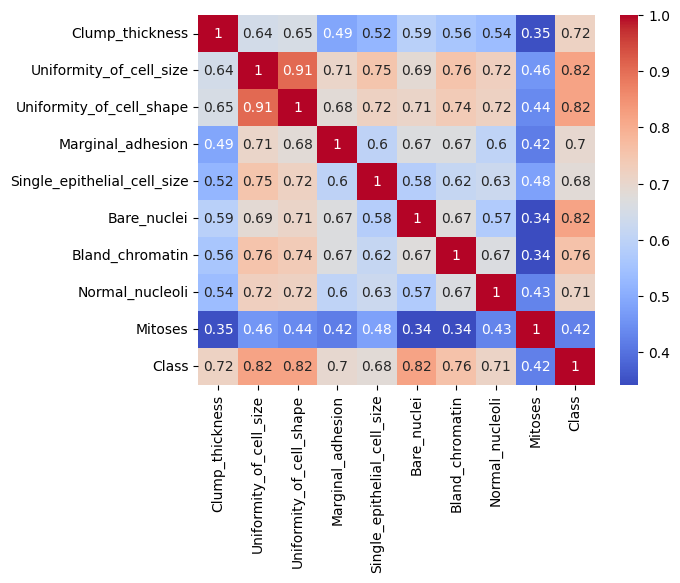

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Identifikasi Kualitas Dataset

## Deteksi Missing Value
Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data.

- Estimasi parameter.

- Imputasi.

In [ ]:
import numpy as np
# Ganti nilai '?' dengan NaN
df.replace('?', np.nan, inplace=True)
df.isnull().sum()
# Cek jumlah nilai yang hilang di setiap kolom

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Terdapat missing value di kolom `Bare_nuclei` yang berjumlah 16 

### Imputasi missing value menggunakan median

In [ ]:
# Pastikan Bare_nuclei tipe numerik
df['Bare_nuclei'] = df['Bare_nuclei'].astype(float)

# Imputasi dengan median
df['Bare_nuclei'] = df['Bare_nuclei'].fillna(df['Bare_nuclei'].median())


Lalu cek kembali apakah masih ada missing value

In [21]:
df.isnull().sum()
# Cek jumlah nilai yang hilang di setiap kolom

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Penjelasan kenapa saya menggunakan median untuk penanganan missing value 
### Penanganan Missing Value

Pada dataset Breast Cancer Wisconsin, ditemukan missing value pada kolom **Bare_nuclei**. Untuk mengatasi hal tersebut, dipilih metode imputasi menggunakan **Median**, dengan pertimbangan sebagai berikut:

#### Alasan Memilih Median:
1. **Tipe Data Numerik dan Ordinal:**  
   Kolom Bare_nuclei berisi nilai dalam skala ordinal (tingkatan), sehingga median lebih sesuai karena mempertahankan sifat data yang berurutan, tanpa terpengaruh besar kecilnya rentang nilai secara ekstrem.

2. **Robust terhadap Outlier:**  
   Median adalah nilai tengah data yang tidak dipengaruhi oleh outlier atau data ekstrem. Mengingat data medis seperti ini berpotensi memiliki nilai-nilai ekstrem, penggunaan median menjaga agar hasil imputasi tetap stabil dan tidak bias.

3. **Distribusi Data Tidak Dipastikan Normal:**  
   Sebelum dilakukan transformasi, distribusi data Bare_nuclei belum tentu normal. Jika data tidak normal, penggunaan **Mean** berisiko memberikan nilai imputasi yang bias, sementara median tetap aman digunakan.

4. **Efisiensi dan Kesederhanaan:**  
   Imputasi median sangat mudah diimplementasikan, cepat secara komputasi, dan cukup efektif, khususnya untuk dataset kecil hingga menengah seperti Breast Cancer Wisconsin.



#### Kenapa Tidak Menggunakan Mean?

- **Sensitif terhadap Outlier:**  
  Mean sangat mudah terpengaruh oleh nilai ekstrem, sehingga dapat menghasilkan nilai imputasi yang tidak representatif, terutama jika distribusi data tidak simetris.

- **Kurang Tepat untuk Data Ordinal:**  
  Untuk data berskala ordinal, median lebih merepresentasikan "pusat" data secara urutan dibandingkan mean.



#### Kenapa Tidak Menggunakan KNN Imputer?

- **Kebutuhan Komputasi Lebih Tinggi:**  
  KNN Imputer memerlukan perhitungan jarak antar data yang lebih kompleks. Dengan dataset kecil-menengah seperti ini, metode sederhana seperti median sudah cukup memadai.

- **Risiko Distorsi jika Distribusi Tidak Merata:**  
  KNN Imputer mengandalkan pola jarak antar data. Jika distribusi data tidak merata atau terdapat noise, hasil imputasi bisa kurang akurat.

- **Sesuai Skala Analisis:**  
  Mengingat tujuan tugas ini adalah analisis yang relatif sederhana untuk prediksi diagnosis, metode imputasi yang kompleks seperti KNN dianggap belum diperlukan.



### **Kesimpulan**

Dengan mempertimbangkan tipe data, distribusi, potensi outlier, efisiensi, dan kompleksitas algoritma, metode **Median** dipilih sebagai teknik imputasi yang paling tepat untuk menangani missing value pada kolom Bare_nuclei dalam uas ini.
```



# Preprocessing-Data

## Transformasi data untuk model Logistic Regression

kenapa Transformasi Data Hanya untuk Logistic Regression?

Transformasi data berupa standarisasi hanya dilakukan pada model Logistic Regression karena model ini sensitif terhadap skala data. Logistic Regression berbasis perhitungan linier, sehingga perbedaan skala antar fitur dapat memengaruhi hasil prediksi.

Sementara itu, model Decision Tree dan Random Forest tidak memerlukan transformasi karena cara kerjanya berdasarkan pemisahan data (split) dan tidak terpengaruh oleh besar kecil nilai fitur.


memisahkan fitur dan target(class)

In [26]:
X = df.drop('Class', axis=1)
y = df['Class']
# Normalisasi fitur numerik

Split Data Training & Testing 

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
82                 5                        2                         1   
51                 5                        3                         3   
220                1                        1                         1   
559                5                        1                         1   
544                2                        1                         3   
..               ...                      ...                       ...   
71                 6                       10                         2   
106               10                       10                        10   
270                8                        4                         7   
435               10                        8                        10   
102                4                        1                         2   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
82                   1         


Berdasarkan hasil proses split dataset menjadi data training dan data testing, diperoleh rincian sebagai berikut:

- **Data Training (X_train):**  
  Total: 559 baris, 9 kolom fitur  
  Merupakan data yang digunakan untuk proses training model.

- **Data Testing (X_test):**  
  Total: 140 baris, 9 kolom fitur  
  Merupakan data yang digunakan untuk menguji performa model yang telah dilatih.

- **Label Training (y_train):**  
  Total: 559 baris  
  Label diagnosis untuk data training.

- **Label Testing (y_test):**  
  Total: 140 baris  
  Label diagnosis untuk data testing.

**Catatan:**  
Proses split dilakukan untuk memisahkan data yang digunakan untuk training dan pengujian model, sehingga evaluasi performa model menjadi lebih objektif dan tidak terjadi overfitting.


Transformasi Data (Normalisasi/Standarisasi)  
Karena Logistic Regression sensitif ke skala data, pakai StandardScaler:

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transformasi khusus untuk data training & testing Logistic Regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training 3 model

## Modeling menggunakan logistic regression
Konsep Dasar
Logistic Regression adalah model klasifikasi linier yang digunakan untuk memprediksi probabilitas suatu sampel termasuk ke dalam kelas tertentu. Model ini bekerja dengan menghitung kombinasi linier dari fitur, kemudian menerapkan fungsi aktivasi sigmoid untuk menghasilkan output antara 0 dan 1.

**Fungsi Sigmoid:**
\[
P(y=1|x) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}}
\]

### Karakteristik:
- Cocok untuk klasifikasi biner.
- Output berupa probabilitas prediksi.
- Sangat sensitif terhadap skala data → **dilakukan standarisasi menggunakan StandardScaler**.

### Visualisasi Konsep:
Jika data dapat dipisahkan linier, Logistic Regression mencari garis atau hyperplane pemisah terbaik antar kelas.

Logistic Regression (pakai data hasil transformasi)

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

## Modeling menggunakan decision tree
### Konsep Dasar
Decision Tree adalah algoritma berbasis pohon yang membagi data berdasarkan nilai ambang (threshold) dari fitur-fitur yang ada. Setiap cabang pohon merepresentasikan keputusan berdasarkan fitur tertentu, dan setiap daun pohon (leaf node) menunjukkan hasil prediksi kelas.


### Karakteristik:
- Tidak sensitif terhadap skala data.
- Mudah divisualisasikan.
- Mampu memodelkan relasi non-linier antar fitur.

Decision Tree (pakai data original, tidak perlu transformasi)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Random Forest

### Konsep Dasar
Random Forest adalah metode ensemble yang menggabungkan banyak pohon keputusan (Decision Trees) untuk meningkatkan akurasi dan stabilitas model.

**Prinsip Utama:**
- Menggunakan teknik **Bootstrap Aggregation (Bagging)**, yaitu membuat banyak subset acak dari data training.
- Setiap pohon dilatih dengan subset data yang berbeda.
- Hasil akhir ditentukan berdasarkan voting mayoritas dari semua pohon.

Pohon 1: Prediksi Kelas 2  
Pohon 2: Prediksi Kelas 4  
Pohon 3: Prediksi Kelas 4  
Hasil Voting: Kelas 4  

### Karakteristik:
- Robust terhadap overfitting.
- Tidak sensitif terhadap skala data.
- Dapat menangani data dengan pola kompleks.


Random Forest (pakai data original, tidak perlu transformasi)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluasi Model

Evaluasi dengan:

Akurasi

Confusion Matrix

Classification Report (Precision, Recall, F1-Score)

Logistic Regression:

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test_scaled)
print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Akurasi: 0.9642857142857143
Confusion Matrix:
 [[94  1]
 [ 4 41]]
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



Decision Tree

In [33]:
y_pred_dt = dt.predict(X_test)
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Akurasi: 0.9357142857142857
Confusion Matrix:
 [[92  3]
 [ 6 39]]
              precision    recall  f1-score   support

           2       0.94      0.97      0.95        95
           4       0.93      0.87      0.90        45

    accuracy                           0.94       140
   macro avg       0.93      0.92      0.92       140
weighted avg       0.94      0.94      0.94       140



Random Forest

In [34]:
y_pred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Akurasi: 0.9642857142857143
Confusion Matrix:
 [[93  2]
 [ 3 42]]
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        95
           4       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



# Visualisasi & Perbandingan Evaluasi 3 Model

Kumpulkan Akurasi Masing-masing Model

In [35]:
akurasi_lr = accuracy_score(y_test, y_pred_lr)
akurasi_dt = accuracy_score(y_test, y_pred_dt)
akurasi_rf = accuracy_score(y_test, y_pred_rf)

print(f"Akurasi Logistic Regression: {akurasi_lr:.2f}")
print(f"Akurasi Decision Tree: {akurasi_dt:.2f}")
print(f"Akurasi Random Forest: {akurasi_rf:.2f}")


Akurasi Logistic Regression: 0.96
Akurasi Decision Tree: 0.94
Akurasi Random Forest: 0.96


# Visualisasi Perbandingan Akurasi

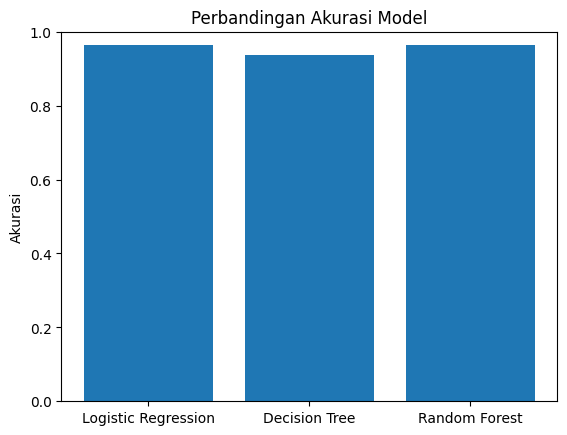

In [36]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
akurasi_values = [akurasi_lr, akurasi_dt, akurasi_rf]

plt.bar(model_names, akurasi_values)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()


Visualisasi Confusion Matrix Masing-Masing Model (Opsional)

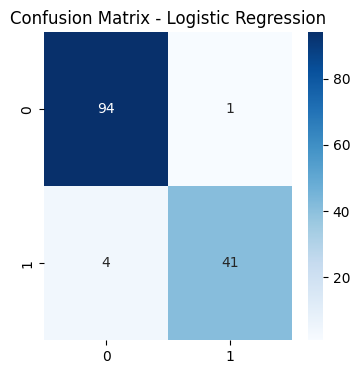

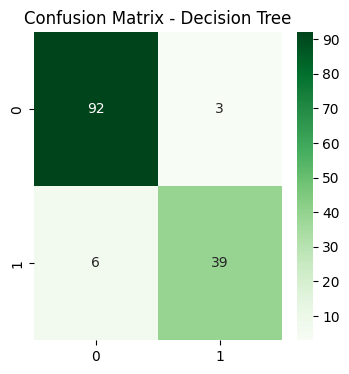

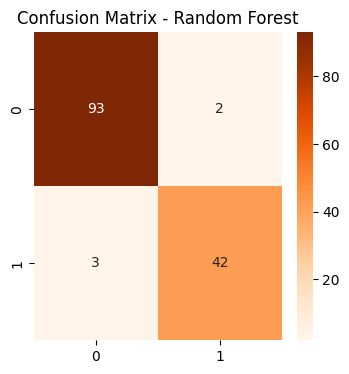

In [37]:
import seaborn as sns

# Logistic Regression
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Random Forest
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Kesimpulan

## Hasil Evaluasi Model Klasifikasi pada Dataset Breast Cancer Wisconsin

Berikut adalah perbandingan kinerja tiga model klasifikasi yang dievaluasi pada dataset Breast Cancer Wisconsin:

| Model               | Akurasi | Precision (Class 4) | Recall (Class 4) | F1-Score (Class 4) |
| :------------------ | :------ | :------------------ | :--------------- | :----------------- |
| Logistic Regression | 96.43%  | 0.98                | 0.91             | 0.94               |
| Decision Tree       | 93.57%  | 0.93                | 0.87             | 0.90               |
| Random Forest       | 96.43%  | 0.95                | 0.93             | 0.94               |


### Catatan Penting:

* **Class 4** mewakili prediksi kanker **ganas (malignant)**, yang deteksinya sangat krusial.
* **Recall Class 4** adalah metrik yang sangat penting dalam konteks medis. Metrik ini menunjukkan seberapa baik model dapat mendeteksi kasus kanker ganas.
* Meskipun **akurasi umum** itu baik, dalam kasus medis, metrik seperti **Recall** dan **F1-Score** untuk kelas ganas harus menjadi **prioritas utama**.

## Model yang akan di Deployment adalah Random Forest

Berdasarkan evaluasi, model **Random Forest** adalah pilihan terbaik untuk deployment. Berikut adalah alasan utama mengapa Random Forest direkomendasikan:

* **Akurasi Tinggi:** Model ini mencapai akurasi **96.43%**, setara dengan performa Logistic Regression.  

* **Recall Unggul untuk Kelas Ganas (Class 4):** Random Forest menunjukkan nilai Recall yang lebih baik yaitu **93%**, dibandingkan dengan Logistic Regression yang hanya 91%. Ini sangat penting karena recall tinggi berarti lebih banyak kasus kanker ganas berhasil terdeteksi.  

* **F1-Score yang Sangat Baik:** Dengan F1-Score sebesar **0.94** untuk kelas ganas, Random Forest menunjukkan keseimbangan yang baik antara precision dan recall dalam mendeteksi kanker ganas.  

* **Lebih Robust Terhadap Overfitting:** Dibandingkan dengan Decision Tree tunggal, Random Forest secara inheren lebih tangguh terhadap masalah overfitting, memastikan kinerja yang lebih konsisten pada data baru.  

* **Stabil untuk Data Tabular:** Model ini sangat cocok dan stabil untuk jenis data tabular seperti dataset kanker payudara ini.  

* **Praktis untuk Deployment:** Random Forest tidak memerlukan transformasi atau normalisasi data tambahan saat digunakan untuk prediksi di sistem produksi, menjadikannya pilihan yang lebih praktis dan efisien untuk deployment.


# Deployment

## Proses Deployment:

Tahapan deployment dilakukan dengan cara:

1. **Model yang telah dilatih (fit) disimpan ke dalam format file `.pkl`** menggunakan library `joblib`.
2. File model dapat diintegrasikan ke dalam aplikasi atau sistem prediksi.
3. Saat proses prediksi, data input baru dimasukkan ke model tanpa perlu transformasi tambahan.
4. Model memberikan output berupa prediksi diagnosis:  
   - `2` = Tumor Jinak (*Benign*)  
   - `4` = Tumor Ganas (*Malignant*)  


### Menyimpan model

In [42]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### Load Model

In [44]:
loaded_model = joblib.load('random_forest_model.pkl')

### Prediksi Data Baru

In [45]:
import numpy as np

# Contoh data baru, isi sesuai urutan fitur dataset kamu
data_baru = np.array([[5, 3, 2, 1, 2, 1.0, 3, 1, 1]])  # nilai-nilai bisa kamu sesuaikan

# Prediksi hasil
hasil_prediksi = loaded_model.predict(data_baru)

# Interpretasi hasil
if hasil_prediksi[0] == 2:
    print("Hasil prediksi: Tumor Jinak (Benign)")
elif hasil_prediksi[0] == 4:
    print("Hasil prediksi: Tumor Ganas (Malignant)")
else:
    print("Hasil prediksi tidak teridentifikasi.")


Hasil prediksi: Tumor Jinak (Benign)


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Integrasi Model Dengan Web

Untuk mengintegrasikan model machine learning yang telah dibuat ke dalam tampilan web, saya menggunakan framework **Streamlit**, yang memudahkan proses pembuatan antarmuka web sederhana berbasis Python.

### Langkah-Langkah:

- Install library Streamlit dengan perintah berikut pada terminal:
  ```bash
  pip install streamlit

- Membuat file berekstensi .py, misalnya app.py.  

- Di dalam file app.py, saya memanggil model yang telah disimpan sebelumnya dalam format .pkl hasil proses training.

- Selanjutnya, saya membuat tampilan web yang berisi:

 - Informasi dan instruksi penggunaan.

 - Form input untuk memasukkan data hasil pemeriksaan sel sesuai format dataset.

 - Tombol prediksi untuk memproses data input menggunakan model yang telah dilatih.

 - Tampilan hasil prediksi diagnosis (Jinak atau Ganas).

- Semua tampilan dan logika prediksi dibuat dalam file app.py dengan memanfaatkan fitur-fitur dari library Streamlit yang sangat memudahkan pembuatan web interaktif.

### Source Code
Source code lengkap dari integrasi model ke dalam web dapat diakses melalui link berikut:

🔗 Link Repository GitHub untuk deployment:  
(https://github.com/rendydevanodanendra/deployment-uas-pendataD)

### Hasil Web
Link aplikasi web yang dapat diakses oleh siapa saja:  

https://deployment-uas-pendatad-vjamrbrucvz7rj8ux23zdt.streamlit.app/  

Berikut adalah hasil tampilan dari web tersebut. Terdapat form sederhana untuk memasukkan fitur-fitur pemeriksaan sel kanker payudara, dan hasil prediksi akan muncul secara langsung setelah tombol prediksi ditekan.

![image.png](input.png)

### Contoh Pengisian Form Prediksi

Sebagai contoh, saya melakukan input data ke dalam form web prediksi diagnosis kanker payudara dengan nilai sebagai berikut:

- **Clump Thickness** = 7  
- **Uniformity of Cell Size** = 8  
- **Uniformity of Cell Shape** = 7  
- **Marginal Adhesion** = 4  
- **Single Epithelial Cell Size** = 4  
- **Bare Nuclei** = 6.0  
- **Bland Chromatin** = 5  
- **Normal Nucleoli** = 7  
- **Mitoses** = 3  

Nilai-nilai tersebut merepresentasikan karakteristik sel yang menunjukkan adanya ketidakteraturan ukuran dan bentuk sel, peningkatan jumlah inti sel, serta adanya aktivitas pembelahan sel, yang secara umum mengindikasikan adanya potensi tumor ganas (malignant).

Setelah saya klik tombol **Prediksi Diagnosis**, model memberikan output:

**"Hasil Prediksi: Tumor Ganas (Malignant)"**

Hasil prediksi ini sesuai dengan karakteristik data yang diinputkan, di mana sebagian besar indikator menunjukkan abnormalitas sel.


![image-2.png](output.png)